In [19]:
import pandas as pd
samb = r"C:\Users\HP\PycharmProjects\Projet_IA\samb-dataset.csv"
# Afficher les premières lignes du DataFrame
data = pd.read_csv(samb)
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
# Afficher les premières lignes pour vérifier que les données sont correctement chargées
print(data.head())

# Résumé statistique des données
print(data.describe())

# Vérifier s'il y a des valeurs manquantes
print(data.isnull().sum())

# Afficher les types de données de chaque colonne
print(data.dtypes)

# Analyser la distribution des classes (label)
print(data['label'].value_counts())

# Analyser la longueur des textes
data['text_length'] = data['text'].apply(lambda x: len(str(x)))
print(data['text_length'].describe())

# Analyser la longueur des titres
data['title_length'] = data['title'].apply(lambda x: len(str(x)))
print(data['title_length'].describe())

# Afficher un échantillon de textes et de titres
print("Exemple de texte :\n", data['text'].iloc[0])
print("\nExemple de titre :\n", data['title'].iloc[0])

   Unnamed: 0                                              title   
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  \
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.50

In [8]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached regex-2023.12.25-cp311-cp311-win_amd64.whl (269 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import nltk

In [10]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
samb = r"C:\Users\HP\PycharmProjects\Projet_IA\samb-dataset.csv"
data = pd.read_csv(samb)
# Supprimer les valeurs manquantes
data.dropna(inplace=True)

# Supprimer les duplicatas
data.drop_duplicates(inplace=True)

# Fonction de nettoyage du texte
def clean_text(text):
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Supprimer les mots vides
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoindre les tokens en texte nettoyé
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Appliquer la fonction de nettoyage au texte
data['cleaned_text'] = data['text'].apply(clean_text)

# Sauvegarder le dataset nettoyé
data.to_csv("dataset_nettoye.csv", index=False)

In [2]:
import pandas as pd

# Charger le dataset nettoyé depuis le fichier CSV
data_nettoye = pd.read_csv("dataset_nettoye.csv")

# Afficher les premières lignes du dataset nettoyé
print(data_nettoye.head())

   Unnamed: 0                                              title   
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  \
1           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
2           3  Bobby Jindal, raised Hindu, uses story of Chri...   
3           4  SATAN 2: Russia unvelis an image of its terrif...   
4           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label   
0  No comment is expected from Barack Obama Membe...      1  \
1   Now, most of the demonstrators gathered last ...      1   
2  A dozen politically active pastors came here f...      0   
3  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
4  All we can say on this one is it s about time ...      1   

                                        cleaned_text  
0  comment expect barack obama member fyf911 fuky...  
1  demonstr gather last night exercis constitut p...  
2  dozen polit activ pastor came privat dinner 

In [3]:
import pandas as pd

# Charger le dataset nettoyé depuis le fichier CSV
data_nettoye = pd.read_csv("dataset_nettoye.csv")

print(data_nettoye.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71537 entries, 0 to 71536
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    71537 non-null  int64 
 1   title         71537 non-null  object
 2   text          71537 non-null  object
 3   label         71537 non-null  int64 
 4   cleaned_text  70791 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB
None


In [4]:
import pandas as pd

# Charger le dataset nettoyé
data_nettoye = pd.read_csv("dataset_nettoye.csv")

# Analyse de la distribution des classes
d_classe = data['label'].value_counts()

# Afficher la distribution des classes
print("Distribution des classes :")
print(d_classe)


Distribution des classes :
label
1    37106
0    35028
Name: count, dtype: int64


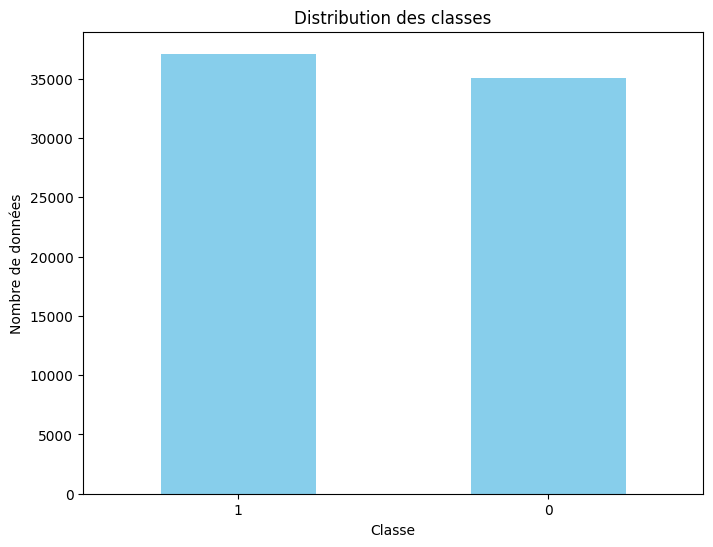

In [6]:
import matplotlib.pyplot as plt

# Plotting the distribution of classes
plt.figure(figsize=(8, 6))
d_classe.plot(kind='bar', color='skyblue')
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre de données')
plt.xticks(rotation=0)
plt.show()


In [8]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     --                                    20.5/300.2 kB 330.3 kB/s eta 0:00:01
     --------------                         112.6/300.2 kB 1.7 MB/s eta 0:00:01
     -----------------------------          235.5/300.2 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


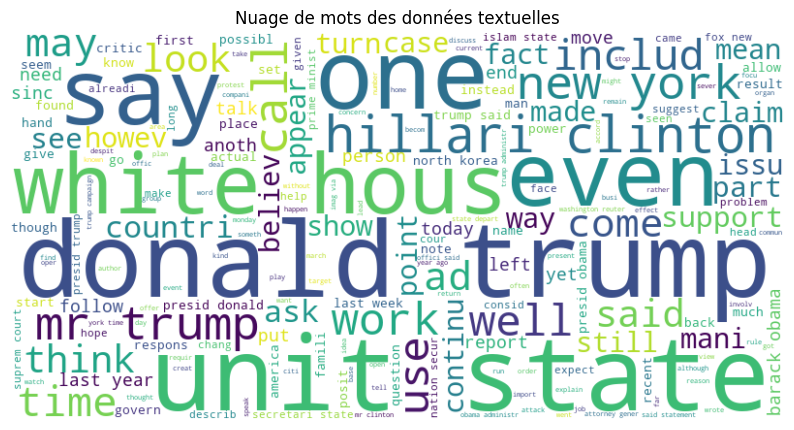

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset nettoyé
data_nettoye = pd.read_csv("dataset_nettoye.csv")
# Concaténer tous les textes dans une seule chaîne
text_combined = ' '.join(data_nettoye['cleaned_text'].dropna())

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_combined)

# Afficher le nuage de mots
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des données textuelles')
plt.show()



In [5]:
pip install scikit-learn

                                              0.0/10.6 MB ? eta -:--:--
                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 1.1 MB/s eta 0:00:10
                                              0.2/10.6 MB 1.8 MB/s eta 0:00:06
     -                                        0.3/10.6 MB 2.3 MB/s eta 0:00:05
     -                                        0.5/10.6 MB 2.2 MB/s eta 0:00:05
     --                                       0.6/10.6 MB 2.5 MB/s eta 0:00:05
     --                                       0.7/10.6 MB 2.6 MB/s eta 0:00:04
     ---                                      0.9/10.6 MB 2.6 MB/s eta 0:00:04
     ----                                     1.1/10.6 MB 2.8 MB/s eta 0:00:04
     ----                                     1.2/10.6 MB 2.9 MB/s eta 0:00:04
     -----                                    1.4/10.6 MB 3.0 MB/s eta 0:00:04
     -----                                    1.5/10.6 MB 2.9 MB/s


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Charger le dataset nettoyé
data_nettoye = pd.read_csv("dataset_nettoye.csv")

# Séparer les données en features (X) et target (y)
X = data_nettoye['cleaned_text']
y = data_nettoye['label']

# Supprimer les valeurs np.nan (choisissez une des méthodes ci-dessus)
X = X.dropna()  #: supprimer les lignes contenant np.nan
y = y.iloc[X.index]  # Conservez uniquement les labels correspondant aux lignes restantes dans X


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer un vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
# Initialiser et entraîner le modèle Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(tfidf_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = naive_bayes.predict(tfidf_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print(classification_report(y_test, predictions))




Accuracy: 0.8619959036655132
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      6977
           1       0.90      0.82      0.86      7182

    accuracy                           0.86     14159
   macro avg       0.86      0.86      0.86     14159
weighted avg       0.87      0.86      0.86     14159



In [ ]:
import tkinter as tk
from tkinter import PhotoImage
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

class FakeNewsDetectorApp:
    
    def __init__(self, master):
        self.master = master
        master.title("PROJET IA 23-24 - Fake News Detector")
        master.configure(bg="#CCCCCC")  # Définir l'arrière-plan gris

        # Charger le logo
        self.logo = PhotoImage(file="C:\\Users\\HP\\logo.png")

        # Calculer les coordonnées pour placer le logo au centre
        x = (master.winfo_screenwidth() - self.logo.width()) // 2
        y = (master.winfo_screenheight() - self.logo.height()) // 2

        # Afficher le logo
        self.logo_label = tk.Label(master, image=self.logo, bg="#CCCCCC")
        self.logo_label.place(x=x, y=y)

        self.label = tk.Label(master, text="Insérer un texte pour tester la fiabilité:", bg="#CCCCCC", fg="#333333", font=("Arial", 12, "bold"))
        self.label.pack(pady=(20, 10))

        self.text_entry = tk.Text(master, height=10, width=50, bd=4, relief="solid", bg="#FFFFFF", fg="#333333", font=("Arial", 10))
        self.text_entry.pack()

        self.detect_button = tk.Button(master, text="Détecter Fake News", command=self.detect_fake_news, bg="#333333", fg="#FFFFFF", font=("Arial", 14, "bold"), padx=10, pady=5, bd=1, relief="solid")
        self.detect_button.pack(pady=10)

        self.result_label = tk.Label(master, text="", bg="#CCCCCC", fg="#333333", font=("Arial", 16, "italic"))
        self.result_label.pack()

    def detect_fake_news(self):
        text = self.text_entry.get("1.0",'end-1c')
        cleaned_text = preprocess_text(text)
        if text:
            # Charger le modèle de détection de fake news
            tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
            naive_bayes = MultinomialNB()
            data_nettoye = pd.read_csv("dataset_nettoye.csv")  # Charger votre dataset
            
            # Remplacer les chaînes vides dans la colonne cleaned_text par "missing"
            data_nettoye['cleaned_text'] = data_nettoye['cleaned_text'].fillna("missing")
            
            X = data_nettoye['cleaned_text']
            y = data_nettoye['label']
            tfidf_X = tfidf_vectorizer.fit_transform(X)
            naive_bayes.fit(tfidf_X, y)
            
            # Prétraiter le texte entré
            cleaned_text = preprocess_text(text)
            tfidf_text = tfidf_vectorizer.transform([cleaned_text])
            
            # Faire une prédiction
            prediction = naive_bayes.predict(tfidf_text)[0]
            probabilities = naive_bayes.predict_proba(tfidf_text)[0]
            reliability_percentage = max(probabilities) * 100  # Utilise la probabilité de la classe prédite
            if prediction == 0:
                result = "Ce texte semble être une vraie nouvelle."
                color = "green"
            else:
                result = "Ce texte semble être une fausse nouvelle."
                color = "black"
                self.animate_fake_news_detection()
            self.result_label.config(text=result + f"\nFiabilité: {reliability_percentage:.2f}%", fg=color)
        else:
            self.result_label.config(text="Veuillez insérer un texte.", fg="black")

    def animate_fake_news_detection(self):
        self.master.after(50, self.shake_window, 5, 5)

    def shake_window(self, dx, dy):
        x = self.master.winfo_x()
        y = self.master.winfo_y()
        self.master.geometry(f"+{x + dx}+{y + dy}")
        self.master.after(50, self.shake_window, -dx, -dy)

def preprocess_text(text):
    if pd.isnull(text) or text == "":  # Vérifier si le texte est NaN ou une chaîne vide
        return "missing"  # Remplacer NaN et les chaînes vides par "missing"
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Supprimer les mots vides
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoindre les tokens en texte nettoyé
    cleaned_text = ' '.join(tokens)
    return cleaned_text

root = tk.Tk()
app = FakeNewsDetectorApp(root)
root.mainloop()
